# Supervised Machine Learning with Acoustic Emisson in Cylindrical Cells

## 1. Classification Using Supervised Machine Learning with Pristine and Aged Cell Data

Acoustic hits dataset of pristine and aged cell cycling will be fed into a supervised machine learning classifier (e.g. logistic regression, support vector machine, deep neural network) to classify aged and pristine cell signals. Signals that are 100% noise waveforms have been manually removed from the dataset.

### 1.1. Classification of Aged vs. Pristine Cell Signals using Neural Networks

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('/Users/seungbinjoo/Desktop/UCL FUSE Internship/Work/5 Experiments/Cylindrical Cell AE Matrix Experiment/Machine Learning Files/NOISE FILTERED Pristine and Aged P42A Machine Learning Data.csv', delimiter =',')

In [2]:
data

,Waveform Number,C-Rate,Transducer Position,Rise Time,Counts to Peak,Energy,Duration,Amplitude,Average Frequency,RMS,ASL,PCNTS,Threshold,Reverberation Frequency,Initiation Frequency,Signal Strength,Absolute Energy,Classification
0,1,0.33,18,12,7,0,73,37,95,0.0004,16,3,29,66,250,1060000.0,3560.0000,Pristine
1,2,0.33,18,1,3,0,64,33,46,0.0004,16,1,29,32,1000,888000.0,1970.0000,Pristine
2,4,0.33,18,22,4,0,95,45,42,0.0004,16,2,29,28,90,4470000.0,41700.0000,Pristine
3,5,0.33,18,1,1,0,1,31,1000,0.0004,16,1,29,1000,1000,58000.0,206.0000,Pristine
4,6,0.33,18,2,3,0,96,34,31,0.0004,16,1,29,22,500,933000.0,1840.0000,Pristine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,13,0.33,18,13,1,0,13,28,76,0.0004,16,1,29,1000,76,210.0,0.5430,Aged
156,17,0.33,18,1,2,0,5,35,400,0.0004,16,1,29,251,1000,140.0,0.5840,Aged
157,23,0.33,18,1,1,0,1,30,1000,0.0004,16,1,29,1000,1000,6.1,0.0196,Aged
158,25,0.33,18,2,2,0,42,36,47,0.0004,16,1,29,26,500,1250.0,4.8800,Aged


In [3]:
# Extract classification column from data frame
classification = data['Classification']

In [4]:
# encode class values as integers
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(classification)
labels = encoder.transform(classification)

In [5]:
# 1 is pristine and 0 is aged
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [6]:
# get rid of columns we don't need
data.drop(['Waveform Number', 'C-Rate', 'Transducer Position', 'Classification'], inplace=True, axis=1)

In [7]:
# Use StandardScaler to standardize the features to have zero mean and unit variance
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
scaled_data = std_scaler.fit_transform(data)

In [8]:
# set aside 20% of train and test data for evaluation
from sklearn.model_selection import train_test_split

# The shuffle function randomly changes the order of the various rows.
# Finally, the random_state initializes the seed for the random function used to split the dataset.
# Setting the random state allows the experiment to be easily reproduced and ensures results within the same parameters.
X_train, X_test, y_train, y_test = train_test_split(scaled_data, labels,
    test_size=0.2, shuffle = True, random_state = 8)

In [9]:
# create deep learning model
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense

model = tf.keras.Sequential([
    tf.keras.layers.Dense(11, activation='relu', input_shape=(14,)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

2023-08-24 15:42:24.310304: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-24 15:42:30.718057: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
# Train the classifier
from keras.callbacks import EarlyStopping

early_stopping3 = EarlyStopping(monitor='val_loss', patience=150)
model_history = model.fit(X_train, y_train, epochs=1000, batch_size=32, verbose=0,validation_split=0.2, callbacks=[early_stopping3])

In [12]:
# Validation loss over time
print('First ten values of validation loss:' + str(model_history.history['val_loss'][:10])+'\n')
print('Last ten values of validation loss:' + str(model_history.history['val_loss'][-10:]))

First ten values of validation loss:[0.6666600108146667, 0.6653416752815247, 0.6645642518997192, 0.6643286347389221, 0.6641795635223389, 0.6637982130050659, 0.6631972193717957, 0.6628655195236206, 0.6625941395759583, 0.6624768376350403]

Last ten values of validation loss:[0.12850600481033325, 0.12578967213630676, 0.12071563303470612, 0.12341904640197754, 0.13138167560100555, 0.1360502541065216, 0.1316898912191391, 0.12661495804786682, 0.12288706749677658, 0.12049739062786102]


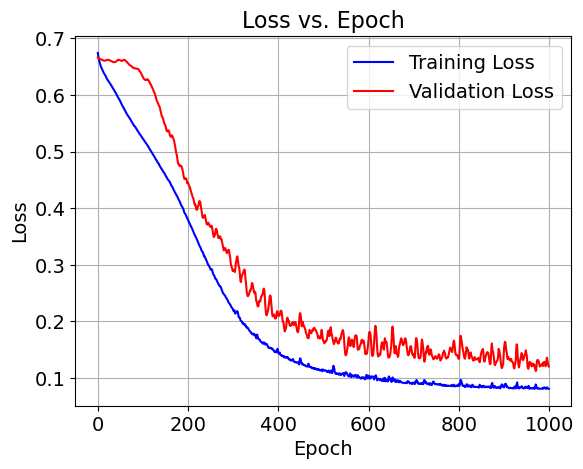

In [13]:
# Plot the loss vs. epochs of training
import matplotlib.pyplot as plt

epochs = range(len(model_history.history['val_loss']))

fig, ax = plt.subplots()
plt.plot(epochs, model_history.history["loss"], 'b', label='Training Loss')
plt.plot(epochs, model_history.history["val_loss"], 'r', label='Validation Loss')
plt.title("Loss vs. Epoch", fontsize=16)
plt.ylabel("Loss", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.grid(True)
plt.legend(fontsize=14)

# Increase font size for tick labels
ax.tick_params(axis='both', which='major', labelsize=14)

plt.show()

In [14]:
# plt.savefig("/Users/seungbinjoo/Desktop/loss_vs_epoch_plot.png", dpi=500)  # You can change the format and resolution as needed

In [15]:
plt.close()

It may take multiple tries for the neural network to train properly. I aim to get the validation loss to converge down as close as possible to the training loss and I also aim to have around a 1000 epochs of training. From trial and error: a good training should have the training loss down to 0.1 and validation loss at around 0.2.

In [16]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)

1/1 - 0s - loss: 0.0836 - accuracy: 0.9375 - 25ms/epoch - 25ms/step

Test accuracy: 0.9375


In [17]:
# Make predictions with test data
predictions = model.predict(X_test)

1/1 [==============================] - 0s 186ms/step


In [18]:
# The trained model's prediction on the test dataset
np.around(predictions)

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)

In [19]:
# The actual labels of the test dataset
y_test

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1])

In [20]:
# Make confusion matrix
confusion_matrix = tf.math.confusion_matrix(
    y_test,
    np.around(predictions),
    num_classes=None,
    weights=None,
    dtype=tf.dtypes.int32,
    name=None
)

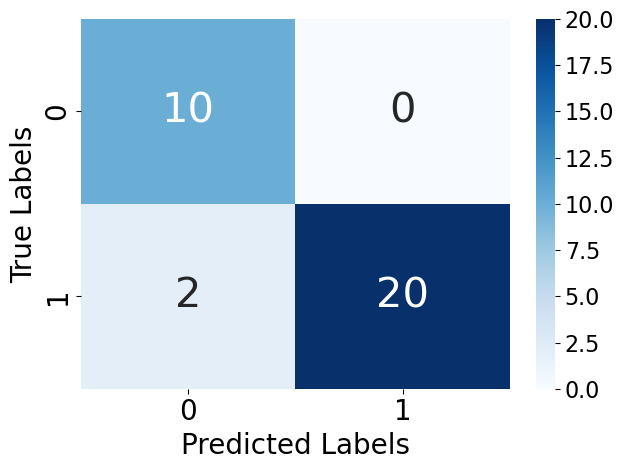

In [21]:
# Plot the confusion matrix using a heatmap
import seaborn as sns

heatmap = sns.heatmap(confusion_matrix, annot=True, cmap='Blues', annot_kws={'fontsize': 30})
plt.xlabel('Predicted Labels',fontsize=20)
plt.ylabel('True Labels',fontsize=20)

# Increase font size of tick labels on x-axis
plt.xticks(fontsize=20)

# Increase font size of tick labels on y-axis
plt.yticks(fontsize=20)

colorbar = heatmap.collections[0].colorbar  # Get the colorbar object
colorbar.ax.tick_params(labelsize=16)  # Increase font size of colorbar ticks

plt.tight_layout()  # Helps in ensuring all elements of the plot are visible

plt.show()

In [22]:
# plt.savefig("/Users/seungbinjoo/Desktop/SoH_confusion_matrix.png", dpi=500)  # You can change the format and resolution as needed

<Figure size 640x480 with 0 Axes>

In [23]:
plt.close()

Recall: 0 is aged and 1 is pristine.

Note: neural network sometimes fails to train properly. I found that the model performs the best when we reach training epochs on the order of 400 to 1000. Sometimes, the early stopping mechanism stops the training early and the validation loss fails to decrease signficantly. In that case, we need to retrain the network. This behaviour likely can be improved with a larger dataset.

Although our model's accuracy seems to be very good, this does not necessarily mean that our model is distinguishing between a pristine and aged cell. There may be experimental bias in the sense that we are testing on two different physical cells so the model may be picking up features that are inherently different between the two different cells which are not necessarily associated with a cell's age. To eliminate this possibility of experimental bias, we should do the same tests on different pristine cells and different aged cells. We cannot be 100% sure that we have eliminated experimental bias however, for every cell and every C-rate run for each cell, we varied the transducer position. The fact that our dataset has taken into account different transduce positions means that the model may be less sensitive to small experimental biases such as surface conditions, effectiveness of couplant application, temperature, etc.

To make an argument for the model that it is not just picking up experimental biases, we can test the model on another unseen dataset from a completely different P42A. This dataset is yet to be obtained:

In [24]:
# extra_test_data = pd.read_csv('/Users/seungbinjoo/Desktop/UCL FUSE Internship/Work/5 Experiments/Cylindrical Cell AE Matrix Experiment/Machine Learning Files/Week 1 and 2 Preliminary Data ML Files/Week 1 and 2 experiment middle position Cby3 data v2.csv', delimiter =',')

In [25]:
# extra_test_data

In [26]:
# encode class values as integers
# from sklearn.preprocessing import LabelEncoder

# classification2 = extra_test_data['Classification']

# extra_test_data.drop(['Waveform Number', 'C-Rate', 'Transducer Position', 'Classification'], inplace=True, axis=1)
# X_test_2 = extra_test_data

# encoder = LabelEncoder()
# encoder.fit(classification2)
# labels2 = encoder.transform(classification2)

# std_scaler = StandardScaler()
# scaled_X_test_2 = std_scaler.fit_transform(X_test_2)

# predictions2 = model.predict(scaled_X_test_2)

# confusion_matrix2 = tf.math.confusion_matrix(
#     labels2,
#     np.around(predictions2),
#     num_classes=None,
#     weights=None,
#     dtype=tf.dtypes.int32,
#     name=None
# )

# sns.heatmap(confusion_matrix2, annot=True, cmap='Blues')
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.show()

In [27]:
# plt.close()

In [28]:
# test_loss, test_acc = model.evaluate(scaled_X_test_2, labels2, verbose=2)

# print('\nTest accuracy:', test_acc)

### 1.2. Classification of Aged vs. Pristine Cell Signals using Logistic Regression

Future work

### 1.3. Classification of Aged vs. Pristine Cell Signals using Support Vector Machine

Future work

## 2. Classification of 1C vs. C/3 Cycling Signals

Future work